In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Importing and reading dataset
df = pd.read_csv("new_cleaned_data.csv")
df

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,3,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,4,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,6,Figo,Ford,2012,175000.0,41000,Diesel
4,7,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...,...
646,883,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,885,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,886,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,888,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [4]:
#Remove Unnamed column
df =df.loc[:,~df.columns.str.contains('^Unnamed')]#Check column name of same pattern in all rows(:) in label based indexing(.loc)
df

,name,company,year,Price,kms_driven,fuel_type
0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,Figo,Ford,2012,175000.0,41000,Diesel
4,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...
646,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


# Distribution of Car Prices

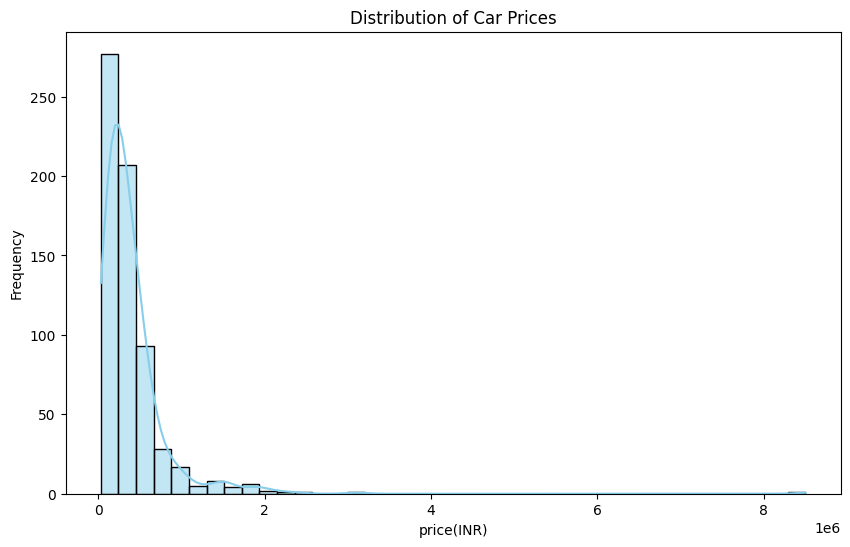

In [5]:
#Distribution of Car Prices
plt.figure(figsize=(10,6)) #Size given in width and height respectively.
sns.histplot(df['Price'], bins=40, kde=True, color='skyblue')#bins is no. of bars
plt.title("Distribution of Car Prices")
plt.xlabel('price(INR)')
plt.ylabel('Frequency')
plt.show()

In [6]:
Interpretetion :The graph shows how car prices are spread. A right-skew indicates most cars are in the lower price range.

SyntaxError: invalid syntax (1973910863.py, line 1)

# Cars by Manufacturing Year

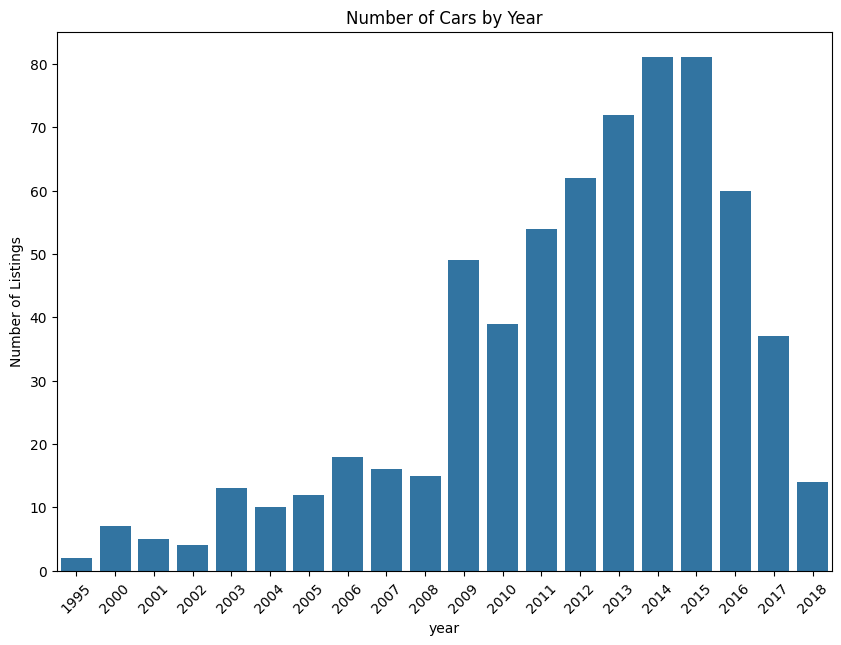

In [7]:
#Cars by Manufacturing Year
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))#Sorted in asc order (year) by default
plt.xticks(rotation=45)#Rotate year in the x axis in 45 degree 
plt.title('Number of Cars by Year')
plt.xlabel('year')
plt.ylabel('Number of Listings')
plt.show()

In [ ]:
Interpretetion : Most listed cars are from recent years. Older cars are fewer due to wear or less demand. and showing trends in car availability over time.

# Kms Driven vs. Price (Scatter Plot)

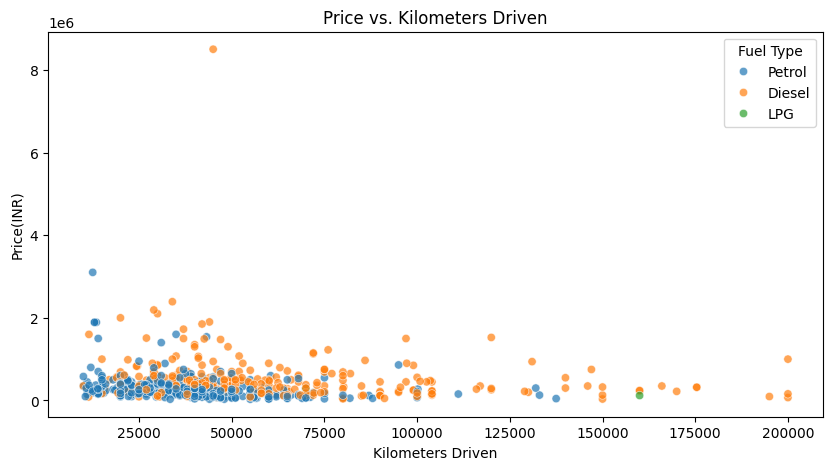

In [8]:
#Kms Driven vs. Price (Scatter Plot)
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='kms_driven', y='Price', hue='fuel_type', alpha=0.7) #hue is Colors the points based on the fuel type of the car. and alpha is set visibility of points
plt.title("Price vs. Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price(INR)")
plt.legend(title='Fuel Type')
plt.show()

In [ ]:
Interpretation: Price generally drops as the kilometers increase. Fuel type may also influence price trends.


# Top 10 Most Listed Car Brands

C:\Users\DELL\AppData\Local\Temp\ipykernel_12900\3684141378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


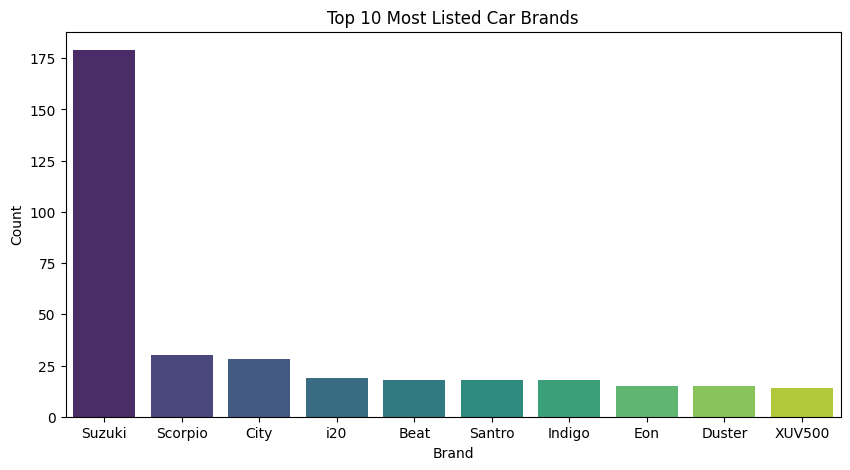

In [9]:
#Top 10 Most Listed Car Brands
df['brand'] = df['name'].str.split().str[0] #Extract Brands at top 10 
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Listed Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

Interpretation: These are the most common car brands sold on the platform. Helps understand market trends. Suzuki is the most demanding brand.

# Price Comparison of Top Brands (Boxplot)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12900\676445205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['brand'].isin(top5)], x='brand', y='Price', palette='pastel')#Listed names of top 5 brands


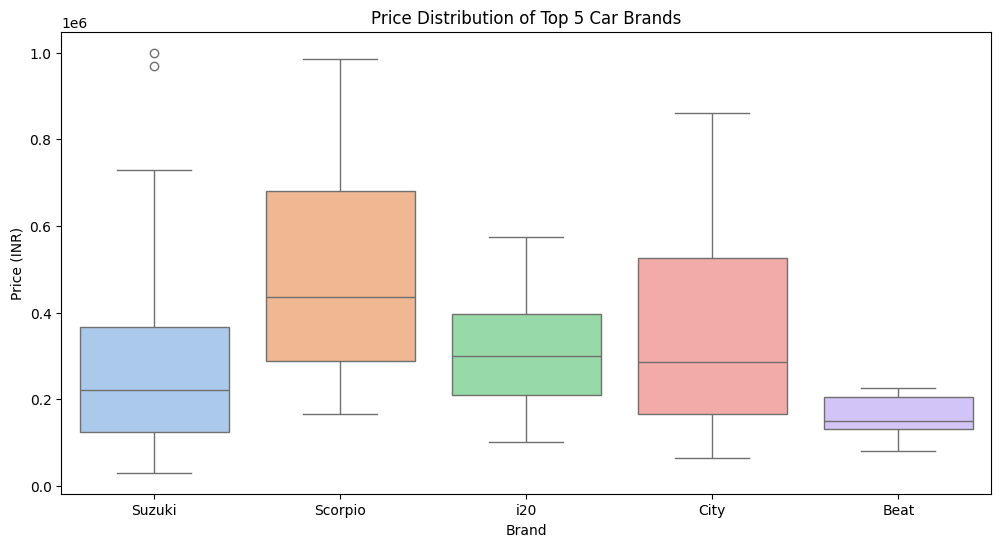

In [10]:
#Price Comparison of Top Brands (Boxplot)
top5 = df['brand'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['brand'].isin(top5)], x='brand', y='Price', palette='pastel')#Listed names of top 5 brands
plt.title('Price Distribution of Top 5 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.show()

In [ ]:
Interpretetion : This shows the price range and outliers per brand. Some brands have higher price variability. Santro targets the lower-budget segment. City and Scorpio Brand attract premium buyyers, these brands may have more models/variants.

# Fuel Type Distribution

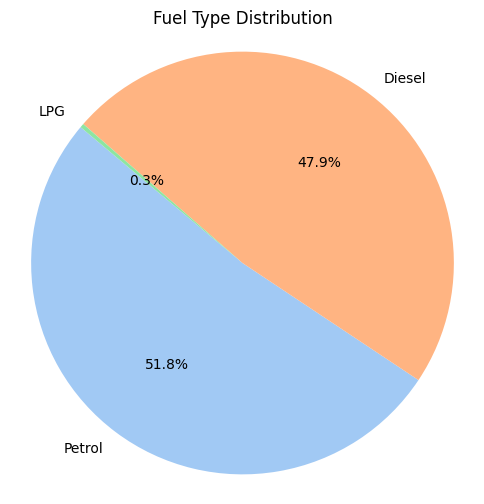

In [11]:
#Fuel Type Distribution
fuel_counts = df['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.axis('equal')  # Equal aspect ratio
plt.show()

In [ ]:
Interpretation: It Reveals fuel types Petrol is most common among listed cars.

# Average Price by Fuel Type

C:\Users\DELL\AppData\Local\Temp\ipykernel_12900\1527244298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='fuel_type', y='Price', estimator='mean', palette='Accent')


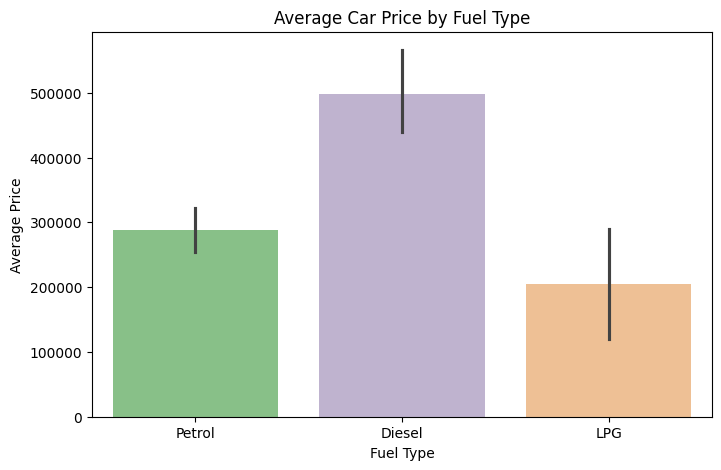

In [12]:
#Average Price by Fuel Type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='fuel_type', y='Price', estimator='mean', palette='Accent')
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


In [ ]:
Interpretetion: Reveals which fuel type tends to have higher average price. Diesel or hybrid cars may often be priced higher.

#  Relationship Between Year and Price

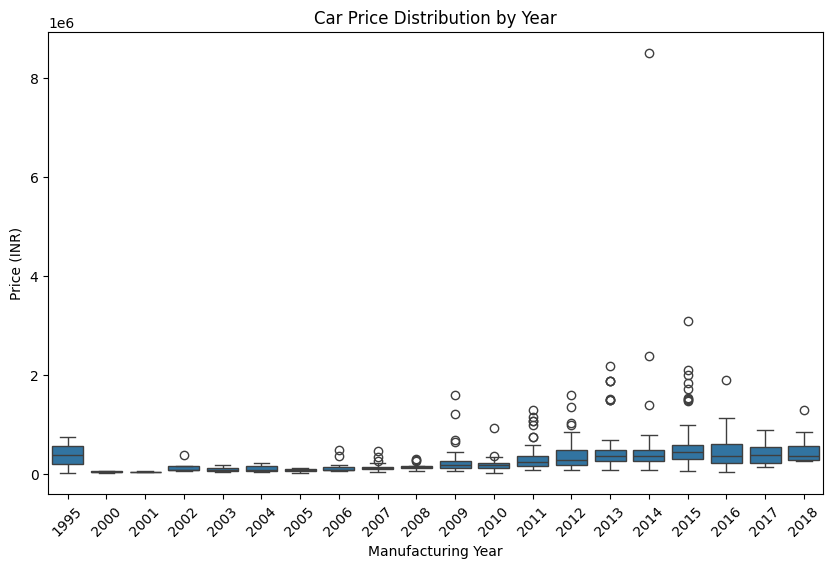

In [13]:
#Relationship Between Year and Price
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='year', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (INR)')
plt.show()

In [ ]:
Interpretetion:Shows how price varies with car age. Usually, newer models have higher prices.

# Price Trend Over Years (Mean Price per Year) 

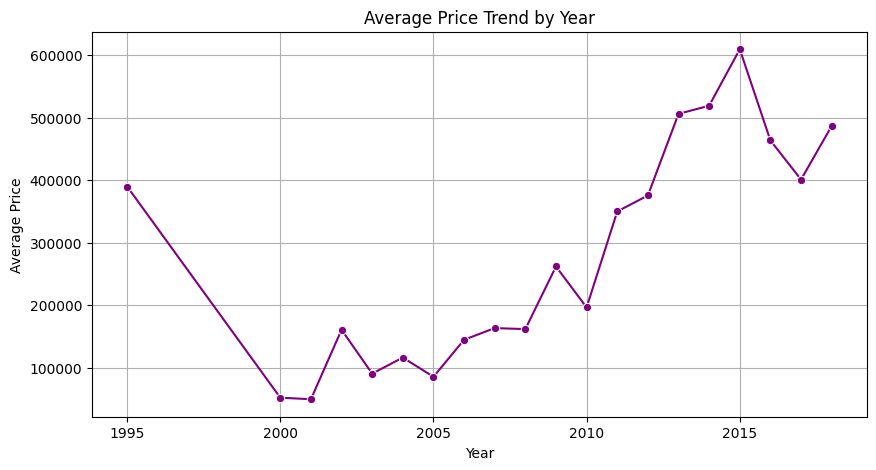

In [14]:
#Price Trend Over Years (Mean Price per Year)

avg_price_by_year = df.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_by_year, x='year', y='Price', marker='o', color='purple')
plt.title('Average Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show() 


In [ ]:
Interpretetion: Helps identify how car prices have changed over the years. Useful for trend analysis.

# Correaltion Heatmap

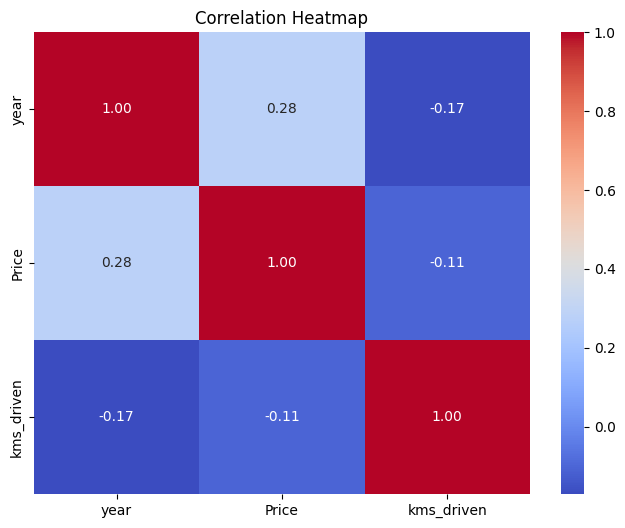

In [15]:
# Correaltion Heatmap
plt.figure(figsize=(8,6))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Interpretetion: Shows correlation between numeric variables like price, mileage, year, kms driven. Useful to identify predictive features. As manufacturing increases, the price also increases. The more a car is driven, the lower its resale value.